# BASICS 04 - Some hacks

In [1]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/antoine/homhots/HOTS/HOTS


In [2]:
import os
import pickle
from Network import network, accuracy_lagorce

In [3]:
%mkdir -p ../Records/EXP_01_LagorceKmeans

# Initialisation of the time-surfaces (TS)

## In Lagorce 2017, initialisation is done with the first N TS

In [4]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-hots_validation2.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first')
    hots.learninglagorce()
    trainmap = hots.traininglagorce()
    testmap, score = hots.testinglagorce(trainmap)
    with open(fname, 'wb') as file:
        pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots, trainmap, testmap = pickle.load(file)
    hots.plotlayer()
    acc = accuracy_lagorce(trainmap, testmap, 'bhatta')*100
    print(f'Classification results on the simple alphabet dataset: {acc}%')

100%|██████████| 558235/558235 [05:49<00:00, 1597.53it/s]


bhatta:97.5% - eucli:95.0% - norm:95.0%


## Random initialisation of the TS 

100%|██████████| 297828/297828 [03:26<00:00, 1441.51it/s]


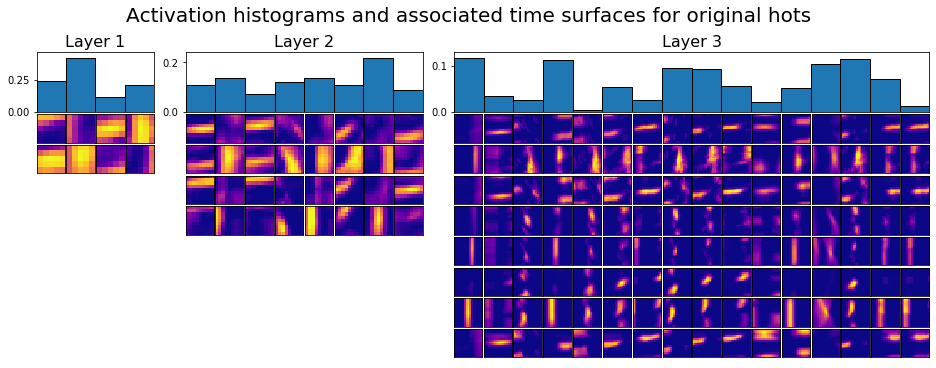

100%|██████████| 558235/558235 [05:51<00:00, 1589.43it/s]

bhatta:100.0% - eucli:97.5% - norm:97.5%


In [5]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-hots_validation_randominit.pkl"
if not os.path.isfile(fname):
    hotsrdn = network(algo='lagorce', krnlinit='rdn')
    hotsrdn.learninglagorce()
    hotsrdn.plotlayer()
    trainmaprdn = hotsrdn.traininglagorce()
    testmaprdn, scorerdn = hotsrdn.testinglagorce(trainmaprdn)
    with open(fname, 'wb') as file:
        pickle.dump([hotsrdn, trainmaprdn, testmaprdn], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsrdn, trainmaprdn, testmaprdn = pickle.load(file)
    hotsrdn.plotlayer()
    acc = accuracy_lagorce(trainmaprdn, testmaprdn, 'bhatta')*100
    print(f'Classification results on the simple alphabet dataset: {acc}%')

# Denoising

## Filtering only the TS on the first layer 

In [6]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-hots_validation.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first')
    hots.learninglagorce()
    trainmap = hots.traininglagorce()
    testmap, score = hots.testinglagorce(trainmap)
    with open(fname, 'wb') as file:
        pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots, trainmap, testmap = pickle.load(file)
    hots.plotlayer()
    acc = accuracy_lagorce(trainmap, testmap, 'bhatta')*100
    print(f'Classification results on the simple alphabet dataset: {acc}%')

100%|██████████| 558235/558235 [05:51<00:00, 1588.36it/s]

bhatta:97.5% - eucli:95.0% - norm:95.0%


## Filtering TS on every layer

100%|██████████| 297828/297828 [03:36<00:00, 1373.17it/s]


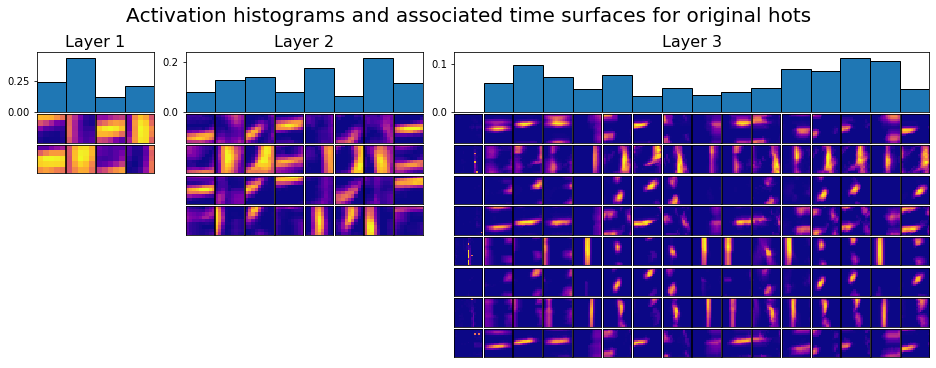

100%|██████████| 558235/558235 [05:53<00:00, 1580.89it/s]


bhatta:97.5% - eucli:100.0% - norm:100.0%


In [7]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-hots_validation_filterall.pkl"
if not os.path.isfile(fname):
    hotsfilt = network(algo='lagorce', krnlinit='first')
    hotsfilt.learninglagorce(filtering='all')
    hotsfilt.plotlayer()
    trainmapfilt = hotsfilt.traininglagorce()
    testmapfilt, scorefilt = hotsfilt.testinglagorce(trainmapfilt)
    with open(fname, 'wb') as file:
        pickle.dump([hotsfilt, trainmapfilt, testmapfilt], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsfilt, trainmapfilt, testmapfilt = pickle.load(file)
    hotsfilt.plotlayer()
    acc = accuracy_lagorce(trainmapfilt, testmapfilt, 'bhatta')*100
    print(f'Classification results on the simple alphabet dataset: {acc}%')

## Applying stronger filter (2*R -> 5*R)

100%|██████████| 297828/297828 [03:17<00:00, 1504.81it/s]


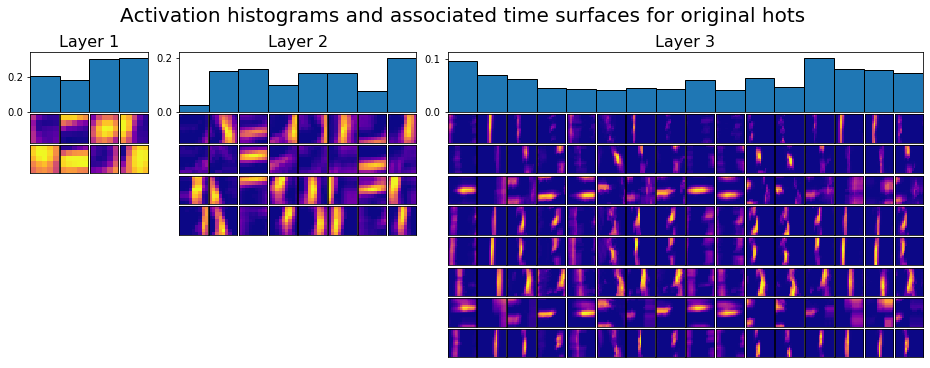

100%|██████████| 558235/558235 [05:32<00:00, 1679.02it/s]


bhatta:97.5% - eucli:95.0% - norm:92.5%


In [8]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-hots_validation_filtx5.pkl"
if not os.path.isfile(fname):
    hotsfiltx5 = network(algo='lagorce', krnlinit='first', filt=5)
    hotsfiltx5.learninglagorce(filtering='all')
    hotsfiltx5.plotlayer()
    trainmapfiltx5 = hotsfiltx5.traininglagorce()
    testmapfiltx5, scorefiltx5 = hotsfiltx5.testinglagorce(trainmapfiltx5)
    with open(fname, 'wb') as file:
        pickle.dump([hotsfiltx5, trainmapfiltx5, testmapfiltx5] , file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsfiltx5, trainmapfiltx5, testmapfiltx5 = pickle.load(file)
    hotsfiltx5.plotlayer()
    acc = accuracy_lagorce(trainmapfiltx5, testmapfiltx5, 'bhatta')*100
    print(f'Classification results on the simple alphabet dataset: {acc}%')